### Notes Day 1

#### INTRO
relative error isnt much used when fitting a continuous fn. Chi sq is preferred because for most algos we dont have mathematical expressions for the parameters and we need to take derivatives. 

read_fwf -> formatted write file
have to specify how file was written

#### REG

assumption: there exists a fn f that describes the data

-> frequentist approach: let the data decide what the predictions are
as opposed to following a bayesian method: likelihood fns. But our matrices are too large for this to be efficient. So we stick to this approach most commonly

MSE is chi2/var

#### LOG REG Exercises

In [28]:
import numpy as np
import sklearn.linear_model as skl
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

import scipy.linalg as scl

**ex1**

In [29]:
x = np.random.rand(100,1)
noise=1*np.random.randn(100,1)
y= 5*x**2 + noise
print(np.mean(noise))

0.029567671549563048


parametrization of the data set fitting a second-order polynomial

In [33]:
#create the design matrix (like we did with liquid drop model)
#then solve for beta by solving for the invertible matrix

then use scikit learn and compare

The coeff: 5.55
The intercept alpha: -1.16
MSE is 1.03
r2 is 0.67


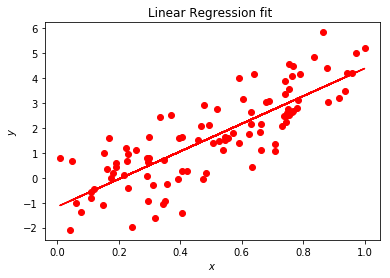

In [32]:
linreg=skl.LinearRegression()
linreg.fit(x,y)

y_predict= linreg.predict(x)
print('The coeff: %.2f' % linreg.coef_)
print('The intercept alpha: %.2f' % linreg.intercept_)
print('MSE is %.2f' % mean_squared_error(y, y_predict) )
print('r2 is %.2f' % r2_score(y, y_predict))
plt.plot(x, y_predict, "r-")
plt.plot(x, y ,'ro')
#plt.axis([0.0,1.0,1.5, 7.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Linear Regression fit ')
plt.show()

**ex3**

Write your own code for the Ridge method and compute the parametrization for different values of $\lambda$. Compare and analyze your results with those from exercise 1. Study the dependence on $\lambda$ while also varying the strength of the noise in your expression for $y(x)$. 
repeat with scikit-learn (run with same random numbers)

Mean squared error: 1.03
Variance score: 0.67
[[5.38483577]] [-1.07890472]


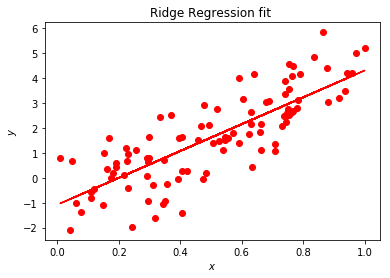

In [45]:
_lambda = 0.2
clf_ridge = skl.Ridge(alpha=_lambda).fit(x, y)
yridge= clf_ridge.predict(x)

print("Mean squared error: %.2f" % mean_squared_error(y, yridge))
# Explained variance score: 1 is perfect prediction                                 
print('Variance score: %.2f' % r2_score(y, yridge))
print(clf_ridge.coef_, clf_ridge.intercept_)

plt.plot(x, yridge, "r-")
plt.plot(x, y ,'ro')
#plt.axis([0.0,1.0,1.5, 7.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Ridge Regression fit ')
plt.show()


3. Our next step is to study the variance of the parameters $\beta_1$ and $\beta_2$ (assuming that we are parametrizing our function with a second-order polynomial. We will use standard linear regression and the Ridge regression.  You can now opt for either writing your own function that calculates the variance of these paramaters (recall that this is equal to the diagonal elements of the matrix $(\hat{X}^T\hat{X})+\lambda\hat{I})^{-1}$) or use the functionality of **scikit-learn** and compute their variances. Discuss the results of these variances as functions 

4. Repeat the previous step but add now the Lasso method. Discuss your results and compare with standard regression and the Ridge regression results.

5. Try to implement the cross-validation as well. 

6. Finally, using **scikit-learn** or your own code, compute also the mean square error, a risk metric corresponding to the expected value of the squared (quadratic) error and r2